# Preprocesado de los datasets con el case_1: SARM y case_2: Klebsiella BLEE

In [1]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Unifico los dos datasets (target-case_1=yes.csv y target-case_2=yes.csv)
# Cargo los datasets
#dt1 = pd.read_csv(r'C:\Users\nfersob\OneDrive - BAHIA SOFTWARE SL\TFM\Datasets\target-case_1=yes.csv', delimiter = ';')
#dt2 = pd.read_csv(r'C:\Users\nfersob\OneDrive - BAHIA SOFTWARE SL\TFM\Datasets\target-case_2=yes.csv', delimiter = ';')
dt1 = pd.read_csv(r'/Users/nicofernandez/TFM/Bahía/Bahía/TFM/TFM sí/Datasets/target-case_1=yes.csv', delimiter = ';')
dt2 = pd.read_csv(r'/Users/nicofernandez/TFM/Bahía/Bahía/TFM/TFM sí/Datasets/target-case_2=yes.csv', delimiter = ';')

# Tamaño de los dataframes (filas, columnas)
print('El tamaño del dataframe 1 es: ', dt1.shape)
print('El tamaño del dataframe 2 es: ', dt2.shape)

# Excluyo las columnas especificas de cada dataset para comparar el resto de columnas
exclude_columns = {
    'target-case_1=yes.csv':'case_1',
    'target-case_2=yes.csv':'case_2'
}
columnas = list(set(dt1.columns) and set (dt2.columns))
for archivo, col_unicas in exclude_columns.items():
    if col_unicas in columnas:
        columnas.remove(col_unicas)

diff_dt1_dt2 = dt1[columnas].compare(dt2[columnas])
print(f'Columnas diferentes entre los datasets 1 y 2: {diff_dt1_dt2}')

El tamaño del dataframe 1 es:  (1954, 46)
El tamaño del dataframe 2 es:  (1954, 46)
Columnas diferentes entre los datasets 1 y 2: Empty DataFrame
Columns: []
Index: []


In [3]:
# Juntos ambos datasets para trabajar con 1 solo
# Añado la columna única de uno de los datasets (case_1 para dt1 y case_2 para dt2) en el otro dataset
dt1['case_2'] = dt2['case_2']
dt_unificado = dt1

Nulos en el dataset unificado:  0
Duplicados en el dataset unificado:  0


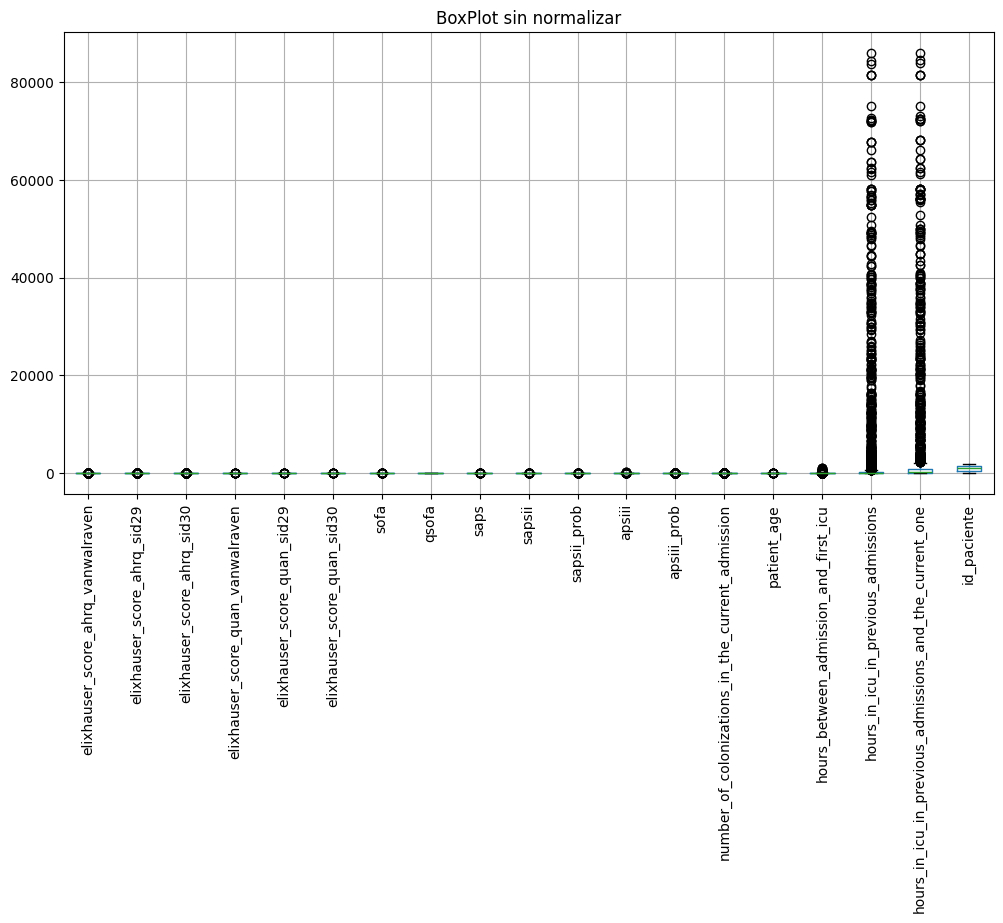

In [4]:
# Recodifico variables: number_of_colonizations_in_the_current_admission
dt_unificado['number_of_colonizations_in_the_current_admission'] = dt_unificado['number_of_colonizations_in_the_current_admission'].replace({'>=4':4}).astype(float)

# Nulos
print('Nulos en el dataset unificado: ', dt_unificado.isnull().sum().sum()) # el primer sum() me lo da por columnas, el segundo suma todos los nulos de todas las columnas

# Duplicados
print('Duplicados en el dataset unificado: ', dt_unificado.duplicated().sum())

# Datos atípicos
numeric_features = dt_unificado.select_dtypes(include=['number']).columns
plt.figure(figsize=(12,6))
dt_unificado[numeric_features].boxplot(rot=90)
plt.title('BoxPlot sin normalizar')
plt.show()

In [5]:
# Guardo el dataset tras procesarlo de nulos, duplicados...
dt_unificado.to_csv('dt_unificado1_2.csv', index=False, sep=';')